In [429]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

In [13]:
word='grail'
sent='a scratch'
word[0]
word[0:3]
sent[-1]
sent[0:-8]
sent[-9:-8]
word[:3]
sent[:]
sent[::2]
# a[start:end:step]

'asrth'

In [18]:
a='world'
s="hello {}"
s.format(a) #{}기호 format 할때 쓰임
print("Some digits of pi:{}".format(3.14))
print("Some digits of %(cont)s: %(value).2f" % {'cont':'e','value':2.718})

Some digits of pi:3.14
Some digits of e: 2.72


In [20]:
data="""
kim 990102-1234567
lee 970102-2234567
"""

In [21]:
import re
pat=re.compile("(\d{6})[-]\d{7}") #[-]:'-'기호, 숫자6자리[-]숫자7자리, ():그룹화
pat.sub("\g<1>-*******",data) #g:그룹을 나타냄

'\nkim 990102-*******\nlee 970102-*******\n'

### 정규표현식  
1. [] : 문자클래스  
- []사이의 문자들과 매치(대괄호 안에는 어떤 문자도 들어갈 수 있음)  
ex) 정규식: [abc]  
"a":매치  
"begin":매치  
"test":매치x  
[0-7]:0에서 7까지([01234567])  
[a-z]:소문자 a에서 z까지  
[a-zA-Z]:대문자 A에서 Z까지  
[^0-9]:숫자가 아닌 문자  
\d:숫자, [0-9]와 같음  
\D:숫자가 아닌 것, [^0-9]와 같음  
\s:[ \t\n\r\f] 공백을 나타냄  
\S:[^\t\n\r\f]  
\w: 문자+숫자, [a-zA-Z0-9_]  
.(점) : 모든 문자(줄바꿈(\n)문자 제외)  
ex) 정규식 : a.b 라고 정의했다고 가정 (a,b 사이에 문자가 있다는 가정)  
akb:매치  
a5b:매치  
aby:매치x  

정규식:a[.]b (a,b 사이에 . 이 와야한다는 가정)  
a[.]b 와 a.b는 완전히 다른 의미임  
정규식:ba*t, *은 0번이상 반복  
bt : 매치  
bat : 매치  
baaaaaaaaaaaaaaaaat : 매치  

정규식:ba+t, +는 1번 이상 반복  
bt : 매치x  

{최소반복횟수, 최대반복횟수}  
{최소반복횟수,} : 최소반복횟수 이상  
{,최대반복횟수} : 최대반복횟수 이하  

ex) {1,} : 최소 1번 이상 반복, +와 같음  
{0,} : 최소 0번 이상 반복, *와 같음  

{2} : 반드시 2번 반복  
정규식 : ba{2}t => baat만 매치됨  
정규식 : ba{2,5}t => a문자가 2번이상 5번이하 반복  

ba?t  
?는 {0,1}와 같음 => a가 0번 이상, 1번 이하로 나오면 된다는 의미(a가 나와도 안나와도 매치됨)  
bt,bat 모두 매치됨  

#### 작성법
import re  
pattern=re.compile('ab*c')  
mathc,search 함수를 이용하여 정규식에 문자열이 매치되는지 여부 확인  


In [37]:
pat=re.compile('[a-z]+')
res=pat.match('deep')
res

<re.Match object; span=(0, 4), match='deep'>

In [43]:
pat=re.compile('[ a-z]+')
res=pat.match('hi deep')
res

<re.Match object; span=(0, 7), match='hi deep'>

In [42]:
pat=re.compile('[a-z7]+')
pat.match('hi de7ep')

<re.Match object; span=(0, 2), match='hi'>

In [50]:
pat=re.compile('[ a-z6-8]+')
res=pat.match('hi de7ep')
#math되는 문자가 없으면 res는 none 출력
if res: #res에 객체가 저장되었다면
    print("매치됨")
    print(res.group())
else: #None = 매치되지 않았다면(객체가 저장되지 않았다면)
    print("매치안됨")

매치됨
hi de7ep


In [55]:
pat=re.compile('[a-z]+')
res=pat.match("3 test")
print(res)

None


In [56]:
# 어디든지 매치되는지 확인할때는 search
# 문자열 왼쪽부터 하나씩 매치되는지 확인할떄는 match
res=pat.search("3 test") # search는 문자열 전체 검색
print(res)

<re.Match object; span=(2, 6), match='test'>


In [59]:
pat.findall("7 life is too short") # 문자열 전체를 다 봄

['life', 'is', 'too', 'short']

In [60]:
pat.search("7 life is too short")

<re.Match object; span=(2, 6), match='life'>

In [61]:
pat.match("7 life is too short") # 매치 안됨

In [63]:
res=pat.finditer("7 life is too short") 
print(res)
for i in res:
    print(i)

<re.Match object; span=(2, 6), match='life'>
<re.Match object; span=(7, 9), match='is'>
<re.Match object; span=(10, 13), match='too'>
<re.Match object; span=(14, 19), match='short'>


In [68]:
res=pat.match('hello')
res
res.group()
res.start() # 몇번째 위치부터 매치됐는지
res.end()
res.span() # 매치가 되어진 범위

(0, 5)

In [69]:
pat=re.compile('[a-z]+')
res=pat.match("test")
res

<re.Match object; span=(0, 4), match='test'>

In [71]:
res=re.match('[a-z]+','test')
res

<re.Match object; span=(0, 4), match='test'>

In [76]:
p=re.compile('[abcd]') # a,b,c,d 문자 중 하나만 매치되면 출력
res=p.match('d')
print(res)

<re.Match object; span=(0, 1), match='a'>


In [ ]:
p=re.compile('abcd') # abcd 모두 매치되야 출력
res=p.match('abcd')
print(res)

In [79]:
p=re.compile('hello|hi') #hello 또는 hi 인 경우에 매치
res=p.match('hello')
print(res)

<re.Match object; span=(0, 5), match='hello'>


In [81]:
pat=re.compile('Life')
res=pat.match('My Life is too short') # 왼쪽에서부터 검색하며 매치가 안되면 끝나버림. 
print(res)

None


In [82]:
pat=re.compile('Life') 
res=pat.findall('My Life is too short Life') 
print(res)

['Life', 'Life']


In [85]:
pat=re.compile('^Life') #Life 시작을 의미
res=pat.match('Life is too short') # 문자열 전체를 검색하지만 Life로 시작하지 않기때문에 None
print(res)

<re.Match object; span=(0, 4), match='Life'>


In [84]:
pat=re.compile('short$') # 문자열 끝이 short 단어 끝남(맨 마지막 문자만 확인)
res=pat.search('My Life is too short Life') 
print(res)

None


챗봇(AI로봇) : 대화 중인 2명 이상  
    나: 안녕?  
    너: 왜?  
    나: 잘 있었어?  
        ...  
xx가 말했다.  
"잘 있었니?"  
위와 같이 대화에서 전처리할 때 정규식이 필요함

In [89]:
# 그룹: ()
p=re.compile('ABC')
res=p.match('ABCABCABC DEF')
print(res)

In [91]:
p=re.compile('ABC')
res=p.search('ABCABCABC DEF')
print(res)

<re.Match object; span=(0, 3), match='ABC'>


In [92]:
p=re.compile('ABC')
res=p.findall('ABCABCABC DEF')
print(res)

['ABC', 'ABC', 'ABC']


In [100]:
p=re.compile('(ABC)+') # ABC가 그룹화
res=p.search('ABCABCABC DEF') # ABC가 여러번 반복된게 다 출력
print(res)

<re.Match object; span=(0, 9), match='ABCABCABC'>


In [118]:
'''
이름+" "+전화번호
kim 010-1234-5678 (0)
010-1234-5678     (x)
010-1234-5678 lee (x)
kim010-1234-5678  (x)
'''
pat=re.compile("(\w+)\s+(\d+[-](\d+)[-]\d+)") #공백1개 \s , 공백 1개 이상일때는 \s+
res=pat.search("kim 010-1234-5678")
print(res)
print(res.group()) # 매치된 전체 문자열 출력
print(res.group(0)) # 매치된 전체 문자열 출력
print(res.group(1)) # 매치된 1번째 그룹 문자열 출력
print(res.group(2)) # 매치된 2번재 그룹 문자열 출력
print(res.group(3)) # 매치된 3번재 그룹 문자열 출력

<re.Match object; span=(0, 17), match='kim 010-1234-5678'>
kim 010-1234-5678
kim 010-1234-5678
kim
010-1234-5678
1234


In [133]:
re.match('[0-9]*','1234')
re.match('[0-9]+','1234')
re.match('[0-9]+','abcd')
print(re.match('a*b','b'))
print(re.match('a*b','aab'))
print(re.match('a+b','aab'))
print(re.match('K?','K'))
print(re.match('K?','K9')) #K뒤 문자 0 또는 1개 있으면 됨
print(re.match('K.','K99')) #K 뒤에 문자가 있다는 의미

<re.Match object; span=(0, 1), match='b'>
<re.Match object; span=(0, 3), match='aab'>
<re.Match object; span=(0, 3), match='aab'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 2), match='K9'>


In [143]:
print(re.match('k{3}','kkabc'))
print(re.match('k{3}','kkkabc'))
print(re.match('kkk','kkkabc'))
print(re.match('(k){3}','kkkabc'))
print(re.match('(hi){3}','hihihihikkkabc'))
print(re.match('(hi)','hihihihikkkabc'))
print(re.match('[0-9]{3}','010-123-4567')) #{}:개수, 숫자 3개를 의미
print(re.match('[0-9]{1,3}','10-123-4567')) #{최소반복횟수, 최대반복횟수}

None
<re.Match object; span=(0, 3), match='kkk'>
<re.Match object; span=(0, 3), match='kkk'>
<re.Match object; span=(0, 3), match='kkk'>
<re.Match object; span=(0, 6), match='hihihi'>
<re.Match object; span=(0, 2), match='hi'>
<re.Match object; span=(0, 3), match='010'>
<re.Match object; span=(0, 2), match='10'>


In [163]:
print(re.match('[a-zA-Z0-9]+',"hello123"))
print(re.match('[가-힣]+','딥러닝')) #R에서도 쓸 수 있음
print(re.match('[^A-Z]+','hello')) # 대문자가 있으면 match가 멈춤
print(re.match('[^A-Z]+','heLlo')) # [^A-Z]+ 대문자를 제외
print(re.match('^[A-Z]+','heLlo')) # 대문자로 시작하는 걸 의미
print(re.match('^[A-Z]+','HELlo'))


<re.Match object; span=(0, 8), match='hello123'>
<re.Match object; span=(0, 3), match='딥러닝'>
<re.Match object; span=(0, 5), match='hello'>
<re.Match object; span=(0, 2), match='he'>
None
<re.Match object; span=(0, 3), match='HEL'>
<re.Match object; span=(3, 4), match='7'>
<re.Match object; span=(3, 7), match='7564'>
None


In [170]:
# 숫자로 끝나는 값 매치
print(re.search('[0-9]+$','dlf7'))
print(re.search('[0-9]+$','dlf7564'))
print(re.search('[0-9]+$','dlf7564abd'))

print(re.search('[*]+',"100 ** 2")) #*이 있는지 매치, \* : 메타문자
# 메타문자 : 정규표현식에 사용되는 특별한 의미의 특수문자
# *, (), [], {}...등
print(re.search('\*+',"100 ** 2")) #*이 있는지 매치

<re.Match object; span=(3, 4), match='7'>
<re.Match object; span=(3, 7), match='7564'>
None
<re.Match object; span=(4, 6), match='**'>
<re.Match object; span=(4, 6), match='**'>


In [184]:
# '숫자 숫자'
print(re.match('[0-9 ]+',"10 200"))
print(re.match('[0-9]+ [0-9]+',"10 200"))
print(re.match('[0-9]+\s[0-9]+',"10 200"))

print(re.match('([0-9]+) ([0-9]+)',"10 200")) # 그룹화한걸 따로 출력할 수 있음
res=re.match('([0-9]+) ([0-9]+)',"10 200")

#res.group(2)
print(res.groups()) # 튜플형ㅔres.groups() # 튜플형식
print(res.groups()[0])
print(res.groups()[1])

<re.Match object; span=(0, 6), match='10 200'>
<re.Match object; span=(0, 6), match='10 200'>
<re.Match object; span=(0, 6), match='10 200'>
<re.Match object; span=(0, 6), match='10 200'>
('10', '200')
10
200


In [189]:
# 그룹이 많아서 각 그룹이 어떤걸 출력할지 모를때 각 그룹의 그룹명을 줄 수 있음
res=re.match('(?P<ln>[0-9]+) (?P<sn>[0-9]+) (?P<tn>[0-9]+)',"010 1234 5678")
print(res.group('ln'))
print(res.group('sn'))
print(res.group('tn'))

010
1234
5678


In [198]:
re.findall('[0-9]+',"1 2 abc 3 abc 4 5 abc 67") #1,2,3,4,5,67 추출(길이 1이상 모든 숫자 추출)

['1', '2', '3', '4', '5', '67']

In [262]:
# hello.world (o)
# hello.1234 (x)
# hello (o)
#문자열.문자열
#문자열
print(re.match('([a-z]+)[.]*([a-z]+$)','hello.world'))
print(re.match('([a-z]+)[.]*([a-z]+$)','hello.1234'))
print(re.match('([a-z]+)[.]*([a-z]+$)','hello'))

<re.Match object; span=(0, 11), match='hello.world'>
None
<re.Match object; span=(0, 5), match='hello'>


In [277]:
"asfd".capitalize() #첫 글자를 대문자로
"asfd asfd".count('f') #2
"asfd asfd".startswith('as') # True, as로 시작
"asfd.asfd".endswith("fd") #True, fd 끝
"asfd asfd".find("s") #1 
"asfd asfd".index("asfd") #1 
"asfd asfd".isalpha() #false, 문자열이 문자인지 아닌지, 빈칸도 문자가 아닌걸로 판단
"asfdasfd".isalpha() #true 
"222".isdecimal() #True
"I am 23".isalnum() #false
"Iam23".isalnum() #True
"sdfjlkdf sfd".strip() #'sdfjlkdf sfd'

'sdfjlkdf sfd'

In [280]:
df=pd.DataFrame({'a':[1,2,3], 'b':[2,3,4]})
df

def mysq(x):
    return x**2
def myexp(x,n):
    return x**n

In [284]:
res=df['a'].apply(mysq)
res
df['b'].apply(myexp,n=3)

0     8
1    27
2    64
Name: b, dtype: int64

In [286]:
df
def prn(x):
    print(x)

In [288]:
df.apply(prn,axis=1) # apply함수를 적용할때 axis옵션으로 적용하는 방향을 정할 수 있음

a    1
b    2
Name: 0, dtype: int64
a    2
b    3
Name: 1, dtype: int64
a    3
b    4
Name: 2, dtype: int64


0    None
1    None
2    None
dtype: object

In [290]:
import seaborn as sns
titanic=sns.load_dataset("titanic")

In [291]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [313]:
# 각 컬럼 단위로 결측값의 개수를 출력
def count_missing(data):
    null_data=pd.isnull(data)
    null_count=np.sum(null_data) #컬럼 단위로 true 값만 합쳐짐
    return null_count # 결측값의 개수 리턴 
# 벡터화 연산으로 데이터프레임 전체 데이터가 연산되어 출력

# 각 컬럼 단위로 결측값의 비율 출력
def prop_missing(data):
    n=count_missing(data) # 결측값의 개수
    return n/data.size # data.size : 데이터프레임을 구성하는 모든 컬럼의 대한 데이터 size 출력

In [314]:
cmis_col=titanic.apply(count_missing)
cmis_col

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [315]:
titanic.apply(prop_missing)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [317]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [320]:
# 각 행 단위로 결측값의 개수를 출력
titanic['num_missing']=titanic.apply(count_missing,axis=1)
# titanic.apply(prop_missing,axis=1)
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  num_missing  
0    man        True  NaN  Southampton    no  False            1  
1  woman       False    C    Cherbourg   yes  False            0  
2  woman       False  NaN  Southampton   yes   True            1  
3  woman       False    C  Southampton   yes  False            0  
4    man        True  NaN  Southampton    no   True            1  


In [326]:
df=pd.read_csv("data/gapminder.tsv",sep="\t")
df
df.groupby("year").lifeExp.mean()
df.year.unique() # 중복되지 않는 데이터 추출

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [336]:
#1952년 데이터 출력
y1952=df[df.year==1952]
y1952_mean=y1952.lifeExp.mean()

In [346]:
# df.groupby('year').lifeExp.mean()
df.groupby('year').lifeExp.agg(np.mean) #agg:집계함수
df.groupby('year').lifeExp.agg(np.max)
df.groupby('year').lifeExp.agg(np.size) #사용자정의 함수도 적용 가능
def myMean(v):
    n=len(v)
    sum=0
    for val in v:
        sum+=val
    return sum/n

In [347]:
df.groupby('year').lifeExp.agg(myMean) 

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [349]:
gm=df.lifeExp.mean() #59

In [350]:
#전체 년도 평균과 각 년도별 평균 차이
#1952 -10
#1957 -8
#...
#2007 8

In [359]:
def mean_diff(data, v):
    n=len(data)
    sum=0
    for value in data:
        sum+=value
    mymean=sum/n
    return mymean-v

In [475]:
print(df.groupby('year').lifeExp.agg(mean_diff,v=gm))
type(df.groupby('year').lifeExp)

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64


pandas.core.groupby.generic.SeriesGroupBy

In [364]:
# agg는 여러개의 함수를 동시에 적용할 수 있음
df.groupby('year').lifeExp.agg([np.mean,np.std,np.count_nonzero])

,mean,std,count_nonzero
year,,,
1952,49.057620,12.225956,142.0
1957,51.507401,12.231286,142.0
1962,53.609249,12.097245,142.0
1967,55.678290,11.718858,142.0
1972,57.647386,11.381953,142.0
1977,59.570157,11.227229,142.0
1982,61.533197,10.770618,142.0
1987,63.212613,10.556285,142.0
1992,64.160338,11.227380,142.0


In [365]:
df.groupby('year').lifeExp.agg({'lifeExp': 'std','gdp':'median'})

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,lifeExp,gdp
year,,
1952,12.225956,45.1355
1957,12.231286,48.3605
1962,12.097245,50.8810
1967,11.718858,53.8250
1972,11.381953,56.5300
1977,11.227229,59.6720
1982,10.770618,62.4415
1987,10.556285,65.8340
1992,11.227380,67.7030


In [375]:
def zscore(x):
    return(x-x.mean())/x.std()

In [387]:
df.groupby('year').lifeExp.transform(zscore)

0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
5       38.438
6       39.854
7       40.822
8       41.674
9       41.763
10      42.129
11      43.828
12      55.230
13      59.280
14      64.820
15      66.220
16      67.690
17      68.930
18      70.420
19      72.000
20      71.581
21      72.950
22      75.651
23      76.423
24      43.077
25      45.685
26      48.303
27      51.407
28      54.518
29      58.014
         ...  
1674    49.113
1675    52.922
1676    55.599
1677    58.020
1678    60.308
1679    62.698
1680    42.038
1681    44.077
1682    46.023
1683    47.768
1684    50.107
1685    51.386
1686    51.821
1687    50.821
1688    46.100
1689    40.238
1690    39.193
1691    42.384
1692    48.451
1693    50.469
1694    52.358
1695    53.995
1696    55.635
1697    57.674
1698    60.363
1699    62.351
1700    60.377
1701    46.809
1702    39.989
1703    43.487
Name: lifeExp, Length: 1704, dtype: float64

In [391]:
names1880=pd.read_csv("data/babynames/yob1880.txt",names=['name','sex','births'])
names1880
names1880.shape
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [394]:
# 성별에 따른 사람 수
names1880.groupby("sex").births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [474]:
years=range(1880,2011)
pieces=[]
for year in years:
    path="data/babynames/yob%d.txt" % year
    frame=pd.read_csv(path,names=['name','sex','births'])
    frame['year']=year
    pieces.append(frame)
#     print(frame)
#     print("="*50,year)
len(pieces)
type(pieces) #list [1880's frame, 1881's frame,1882's framem,.....]
names=pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [425]:
# 연도와 성별로 데이터 재구성
# 각 연도별 성별에 따른 데이터의 개수 (신생아 수)
# pivot_table의 함수 default는 mean
total_births=names.pivot_table(index='year',columns='sex',values='births',aggfunc='sum')

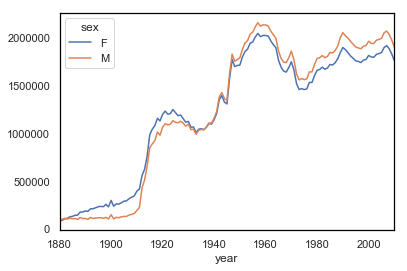

In [430]:
total_births.head()
total_births.plot()

In [ ]:
# 연습문제 1. 이메일 찾기
# 연습문제 2. 토지 대화(""로 묶여있는 부분)만 추출